# Understanding Descriptive Statistics

Import the necessary libraries here:

In [5]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [6]:
# your code here
def rolling_die(die_sides, rolls):
    return random.choices(die_sides, k = rolls)

numbers = [1,2,3,4,5,6]
die_rolls = pd.DataFrame(rolling_die(numbers,10),columns=['Results'])
die_rolls

,Results
0,3
1,5
2,3
3,1
4,1
5,5
6,3
7,3
8,4
9,5


#### 2.- Plot the results sorted by value.

In [7]:
die_rolls.sort_values(0,inplace = True)
die_rolls.plot(kind = "bar")
plt.show()
'''This error only appears if I add "columns=['Results']" to the "die_rolls = pd.DataFrame(rolling_die(numbers,10))" formula. 
If not, it works perfectly. Please, see below'''

KeyError: 0

In [8]:
def rolling_die(die_sides, rolls):
    return random.choices(die_sides, k = rolls)

numbers = [1,2,3,4,5,6]
die_rolls = pd.DataFrame(rolling_die(numbers,10))
die_rolls

,0
0,1
1,5
2,5
3,6
4,4
5,5
6,4
7,6
8,5
9,2


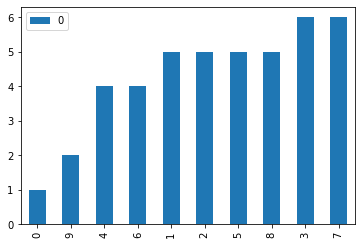

In [9]:
die_rolls.sort_values(0,inplace = True)
die_rolls.plot(kind = "bar")
plt.show()

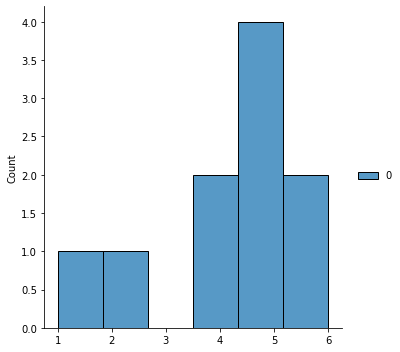

In [10]:
sns.displot(die_rolls, kde=False)

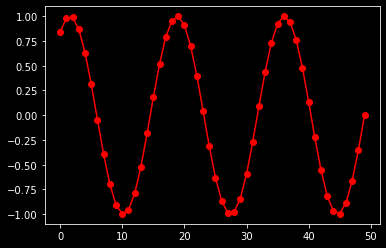

In [11]:
# Cool way that I found out (1)
with plt.style.context(('dark_background')):
    plt.plot(np.sin(np.linspace(1, 6 * np.pi)), 'r-o')
plt.show()

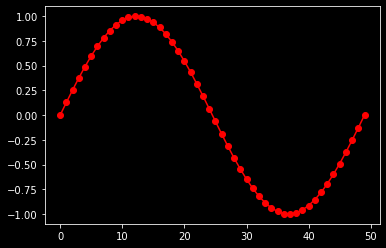

In [12]:
# Cool way that I found out ()
die_rolls.sort_values(0,inplace = True)
with plt.style.context(('dark_background')):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

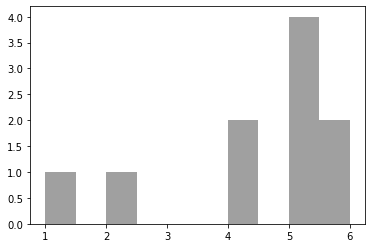

In [13]:
# your code here
plt.hist(die_rolls, facecolor='gray', alpha = 0.75)
plt.show()

In [14]:
"""
It seems that the one above depicts the rolls (number of times and the value of the dice) whilst the other depicts the frequency each number comes out.
"""

'\nIt seems that the one above depicts the rolls (number of times and the value of the dice) whilst the other depicts the frequency each number comes out.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [15]:
die_rolls = pd.DataFrame(rolling_die(numbers,10),columns=['Results'])
die_rolls.sort_values('Results', inplace = True)
die_rolls['Results'] = die_rolls['Results'].astype(int)
die_rolls

,Results
0,1
8,1
9,1
4,3
1,4
6,4
7,4
2,6
3,6
5,6


In [16]:
# your code here
def srg_mean(x):
    return sum(x)/len(x)
srg_mean(die_rolls['Results'])

3.6

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [17]:
# your code here
dice_rolls = die_rolls['Results'].value_counts()
dice_rolls

6    3
4    3
1    3
3    1
Name: Results, dtype: int64

In [54]:
print("Frequency distribution:")
def srg_freq(lst):
    d = {}
    for i in lst:
        if d.get(i):
            d[i] += 1
        else:
            d[i] = 1
    return d
print(srg_freq(sorted(die_rolls['Results'].tolist())))

frequency = srg_freq(sorted(die_rolls['Results'].tolist()))

Frequency distribution:
{1: 3, 3: 1, 4: 3, 6: 3}


In [18]:
srg_mean(dice_rolls)

2.5

In [19]:
#Quick check
import statistics
statistics.mean(dice_rolls)

2.5

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [48]:
# your code here
dice_list = sorted(die_rolls['Results'].tolist())
def median_calc(lst):
    if len(lst) % 2 == 0:
        median1 = lst[len(lst)//2] 
        median2 = lst[len(lst)//2 - 1] 
        median = (median1 + median2)/2
    else: 
        median = lst[len(lst)//2]
    return median
print("Median is:", median_calc(dice_list))

Median is: 4.0


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [24]:
# your code here
print("Data Set:",dice_list)
print("Data length:", len(dice_list))

print("Median:",median_calc(dice_list))


def get_quartiles(dice_list):
    dice_list.sort_values()
    if len(dice_list) % 2 != 0:
        q1 =  dice_list[int(len(dice_list)*1/4)]
        q2 =  dice_list[int(len(dice_list)*2/4)]
        q3 =  dice_list[int(len(dice_list)*3/4)]
    elif len(dice_list) % 4 != 0:
        q1 =  dice_list[int(len(dice_list)*1/4)]
        q2 = (dice_list[int(len(dice_list)*2/4)] + dice_list[int(len(dice_list)*2/4-1)])/2
        q3 =  dice_list[int(len(dice_list)*3/4)]        
    else:
        q1 = (dice_list[int(len(dice_list)*1/4)] + dice_list[int(len(dice_list)*1/4-1)])/2
        q2 = (dice_list[int(len(dice_list)*2/4)] + dice_list[int(len(dice_list)*2/4-1)])/2
        q3 = (dice_list[int(len(dice_list)*3/4)] + dice_list[int(len(dice_list)*3/4-1)])/2   
    return (q1,q2,q3)

print("Q1:",get_quartiles(dice_rolls)[0]) # Q1
print("Q2:",get_quartiles(dice_rolls)[1]) # Mean
print("Q3:",get_quartiles(dice_rolls)[2]) # Q3

Data Set: [1, 1, 1, 3, 4, 4, 4, 6, 6, 6]
Data length: 10
Median: 4.0


KeyError: 0

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [26]:
# your code here
data = pd.read_csv('roll_the_dice_hundred.csv', index_col=0)
data.sort_values(by=['roll'])

,roll,value
0,0,1
1,1,2
2,2,6
3,3,1
4,4,6
...,...,...
95,95,4
96,96,6
97,97,1
98,98,3


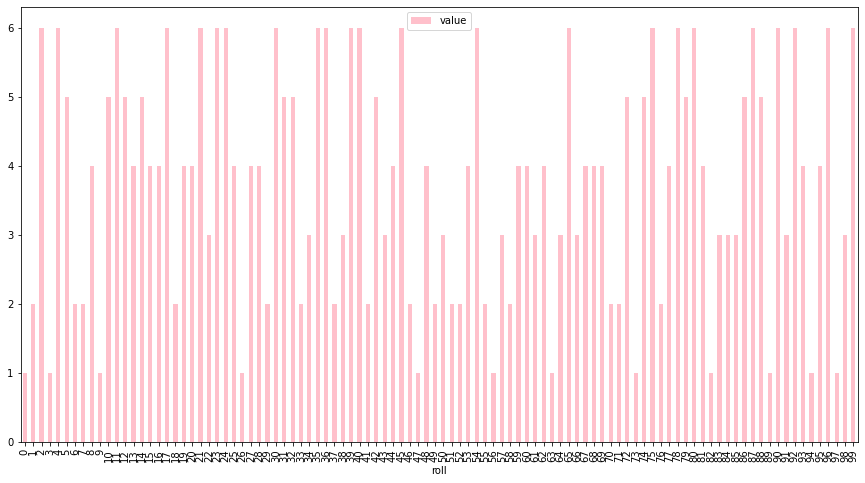

In [37]:
# exploring the data with a histogram
data.set_index("roll").plot.bar(figsize=(15,8),color='pink');

In [ ]:
"""
your comments here

The results depicted in the histogram are random, which is aligned with what should be expected from the experiment (rolling a dice). 
Moreover, the histogram clearly depicts that the distribution of the results is more or less uniform, which is aligned with the likelihood of each of the results.

"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [49]:
# your code here
results = sorted(data['value'].tolist())

print("Median is:",srg_mean(results))

Median is: 3.74


#### 3.- Now, calculate the frequency distribution.


In [52]:
# your code here
freq = data['value'].value_counts()

print('Frequency: ', freq)

Frequency:  6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64


In [56]:
#Cleaner
frequency = srg_freq(results)
print('Frequency: ', frequency)

Frequency:  {1: 12, 2: 17, 3: 14, 4: 22, 5: 12, 6: 23}


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

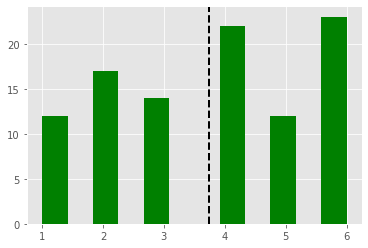

In [60]:
# your code here
x = data['value']

plt.style.use('ggplot')
plt.hist(x, bins=12, color = "green")
plt.axvline(x.mean(), color="black", linestyle='dashed', linewidth=2)
plt.show()

In [61]:
'''
The above histogram shows the mean (3.74) in relation to the data. 
The results of the dice rolling are concentrated around 4, thus the mean.
'''

'\nThe above histogram shows the mean (3.74) in relation to the data. \nThe results of the dice rolling are concentrated around 4, thus the mean.\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [63]:
# your code here
roll_the_dice_thousand = pd.read_csv('roll_the_dice_thousand.csv', index_col=0)

roll_the_dice_thousand.head()

,roll,value
0,0,5
1,1,6
2,2,1
3,3,6
4,4,5


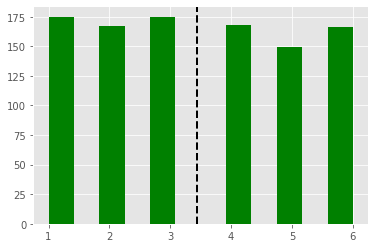

In [66]:
x = roll_the_dice_thousand['value']

plt.style.use('ggplot')
plt.hist(x, bins=12, color = "green")
plt.axvline(x.mean(), color="black", linestyle='dashed', linewidth=2)
plt.show()

In [ ]:
"""
The larger the amount of times we roll the dice, the more likely that we will obtain the same number of times each number, since the probability associated with 
each result is the same (1/6)
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [76]:
# your code here
ages = pd.read_csv('ages_population.csv')
ages.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [78]:
# your code here
freq_ages = srg_freq(ages['observation'])
print('Frequency: ', freq_ages)

Frequency:  {68.0: 3, 12.0: 11, 45.0: 29, 38.0: 30, 49.0: 19, 27.0: 25, 39.0: 45, 42.0: 32, 33.0: 22, 30.0: 34, 25.0: 19, 44.0: 23, 53.0: 12, 46.0: 23, 50.0: 16, 22.0: 16, 6.0: 2, 29.0: 26, 35.0: 33, 28.0: 20, 26.0: 23, 60.0: 4, 41.0: 36, 52.0: 14, 32.0: 30, 23.0: 17, 15.0: 8, 40.0: 27, 63.0: 7, 31.0: 24, 34.0: 29, 61.0: 2, 64.0: 2, 37.0: 30, 56.0: 15, 14.0: 10, 13.0: 6, 51.0: 9, 36.0: 31, 18.0: 7, 48.0: 19, 58.0: 7, 20.0: 13, 54.0: 13, 19.0: 11, 62.0: 4, 55.0: 13, 21.0: 14, 43.0: 32, 17.0: 10, 7.0: 1, 47.0: 17, 1.0: 2, 16.0: 8, 24.0: 18, 59.0: 8, 57.0: 7, 8.0: 5, 67.0: 4, 2.0: 2, 66.0: 3, 4.0: 1, 73.0: 1, 82.0: 1, 70.0: 1, 5.0: 2, 71.0: 1, 9.0: 2, 69.0: 1, 11.0: 3, 10.0: 3, 65.0: 2}


<AxesSubplot:ylabel='Frequency'>

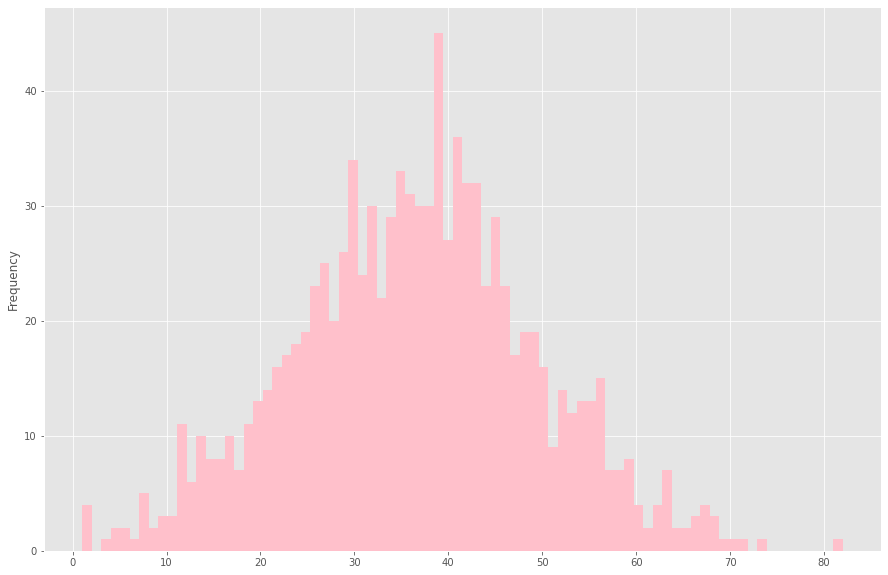

In [80]:
ages["observation"].plot.hist(bins=80, figsize=(15, 10),color = "pink")

In [ ]:
"""
My original guess was that the mean would be around 40 and the standard deviation would be around 12, similar to the original sample
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [82]:
# your code here
ages2 = pd.read_csv('ages_population2.csv')
ages2.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


In [89]:
freq_ages2 = srg_freq(ages2['observation'])
print('Frequency: ', freq_ages2)

Frequency:  {25.0: 98, 31.0: 61, 29.0: 115, 28.0: 139, 30.0: 90, 24.0: 78, 26.0: 120, 21.0: 17, 27.0: 125, 23.0: 41, 22.0: 35, 32.0: 31, 20.0: 13, 33.0: 22, 19.0: 3, 34.0: 7, 35.0: 3, 36.0: 2}


<AxesSubplot:ylabel='Frequency'>

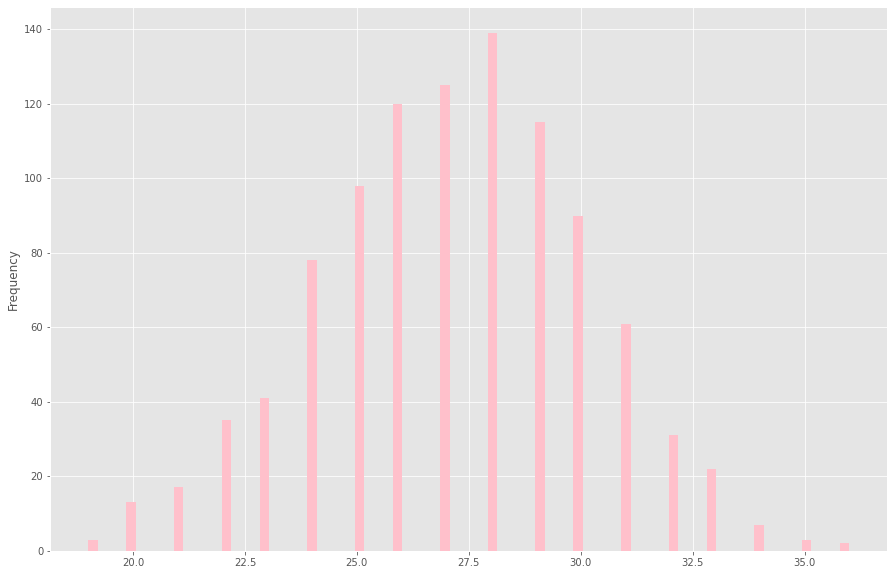

In [84]:
ages2["observation"].plot.hist(bins=80, figsize=(15, 10),color = "pink")

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
The ages range is narrower than the previous distribution.
Moreover, there is a high number of values around 27. 
The maximum value seems to be 35 and the minimum 20.
It may be argued that in view of the distribution shape, these results are further away from a normal distribution, 
having too high middle columns and flattening on the sides of the histogram.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [85]:
# your code here
ages2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [ ]:
"""
The standard deviation is below 3, which means that the sample is narrower.
Furthermore, the mean is also lower, which makes sense because the population on this data set is younger, with the maximum a little bit over 35.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [86]:
# your code here
ages3 = pd.read_csv('ages_population3.csv')
ages3.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


In [90]:
freq_ages3 = srg_freq(ages3['observation'])
print('Frequency: ', freq_ages3)

Frequency:  {21.0: 14, 24.0: 19, 31.0: 21, 54.0: 9, 52.0: 17, 37.0: 31, 69.0: 17, 36.0: 26, 30.0: 24, 64.0: 12, 76.0: 1, 73.0: 6, 42.0: 14, 67.0: 22, 28.0: 18, 50.0: 21, 70.0: 19, 57.0: 8, 20.0: 11, 27.0: 19, 51.0: 14, 56.0: 10, 44.0: 17, 49.0: 18, 65.0: 15, 32.0: 37, 18.0: 9, 45.0: 24, 40.0: 21, 66.0: 19, 72.0: 8, 43.0: 22, 48.0: 25, 35.0: 31, 41.0: 25, 17.0: 10, 23.0: 11, 47.0: 15, 33.0: 17, 15.0: 8, 26.0: 15, 75.0: 2, 29.0: 25, 55.0: 13, 63.0: 12, 39.0: 29, 46.0: 22, 22.0: 11, 71.0: 11, 68.0: 17, 60.0: 6, 34.0: 20, 61.0: 6, 12.0: 4, 38.0: 25, 74.0: 6, 25.0: 17, 53.0: 14, 62.0: 3, 59.0: 8, 19.0: 12, 77.0: 2, 14.0: 5, 16.0: 9, 1.0: 1, 11.0: 2, 13.0: 2, 9.0: 1, 10.0: 2, 2.0: 2, 8.0: 1, 58.0: 6, 4.0: 2, 5.0: 1, 7.0: 1}


#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [96]:
# your code here
ages3.describe().iloc[1:3]

,observation
mean,41.989000
std,16.144706


In [93]:
print(np.mean(ages3.sort_values("observation")))
print(np.std(ages3.sort_values("observation")))

observation    41.989
dtype: float64
observation    16.136632
dtype: float64


<AxesSubplot:ylabel='Frequency'>

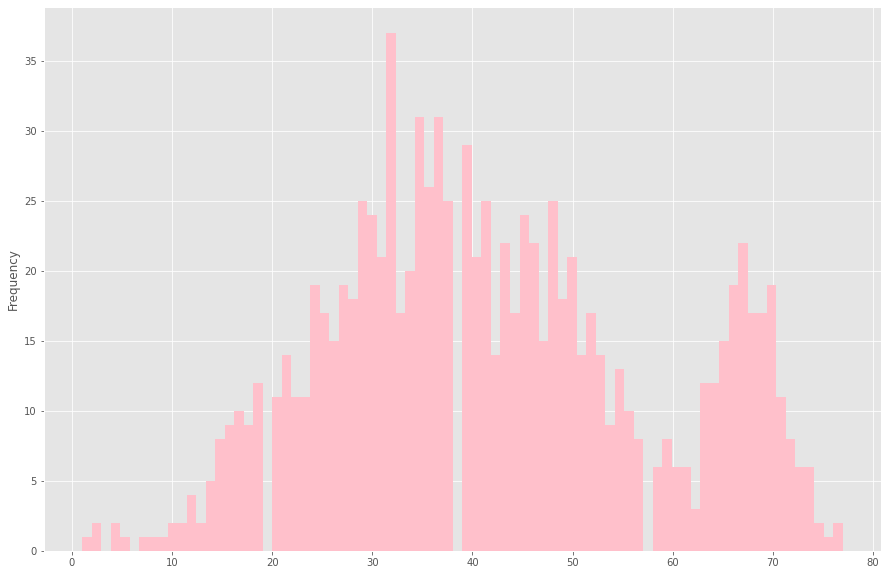

In [94]:
ages3["observation"].plot.hist(bins=80, figsize=(15, 10),color = "pink")

In [ ]:
'''
This third dataset has higher skewness.
Indeed, the mean age has increased, as well as the standard deviation.
It seems that the population age in the dataset is higher and that there are more extreme values on the higher end of the dataset (right tailed)
'''

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [100]:
# your code here
ages3.describe().iloc[3:]

,observation
min,1.0
25%,30.0
50%,40.0
75%,53.0
max,77.0


In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
'''
The median age (40) is extremely close to the mean (41.9) suggesting the distribution 
is normal and less affected by a right skew that may have been perceived from the graph.
Certainly, this may be due to the reduce number of people aged around 60 years.
'''

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""